# Mawrth_Vallis

In this series of note(book)s we are going to review the library using Mars Mawrth Vallis (https://en.wikipedia.org/wiki/Mawrth_Vallis) as instrument-data.

Mawrth Vallis (_MMV_ hereafter) is centered at (approx) 22.5<sup>o</sup>,343.5<sup>o</sup> (lat,lon; C180+E).
Let's define the region of interest as a box of **2** degrees sides around those coordinates:

In [1]:
bbox = {
    'minlat': 21.5,
    'maxlat': 23.5,
    'westlon': 342.5-360,
    'eastlon': 344.5-360
}

## Data query

The we are eventually going to download comes from USGS/PDS; to know where the data is available for download (ie, URL),
we query USGS' ODE (https://ode.rsl.wustl.edu/) servers.
All those quirks -- query, retrieve, select, etc. -- are implemented in the lib.

First thing we do is to query what are the datasets the (NPT) lib supports; And then we go query for them products.

In [2]:
import npt

npt.datasets.list()

['mars/mex/hrsc/rdrv3',
 'mars/mex/hrsc/refdr3',
 'mars/mro/ctx/edr',
 'mars/mro/hirise/rdrv11']

In [3]:
npt.log.set_level = npt.log.setLevel
# npt.log.set_level('DEBUG')

In [4]:
import geopandas
import pandas
pandas.set_option('display.max_columns',100)

### CTX

In [5]:
query_results_ctx = npt.search.ode(dataset='mars/mro/ctx/edr', bbox=bbox, match='intersect')

INFO:_ode.parse(): 76 products found


In [6]:
query_results_ctx.sample(5)

id mission inst type Target_name  \
19  G03_019242_2045_XI_24N017W     MRO  CTX  EDR        MARS   
15  B02_010394_2026_XI_22N016W     MRO  CTX  EDR        MARS   
57  K04_054977_2025_XN_22N017W     MRO  CTX  EDR        MARS   
64  K17_059962_2025_XN_22N017W     MRO  CTX  EDR        MARS   
41  J09_048239_2025_XN_22N017W     MRO  CTX  EDR        MARS   

   Footprints_cross_meridian Map_scale Center_latitude Center_longitude  \
19                     False      5.93         24.2777         342.1672   
15                     False      5.63         22.3779         343.2509   
57                     False      5.63         22.3216         342.4507   
64                     False      5.64         22.3612         342.9444   
41                     False      5.67         22.3463         342.6642   

   Easternmost_longitude Westernmost_longitude Minimum_latitude  \
19                342.76                341.55          21.6471   
15                343.83                342.65          19.7538   
57                342.75                342.15          21.9445   
64                343.25                342.63          21.9247   
41                342.99                342.34          21.8057   

   Maximum_latitude Emission_angle Incidence_angle Phase_angle  \
19          26.8961          12.41           50.34          38   
15          25.0098           2.86            51.2       48.37   
57          22.7081           0.09           50.85       50.85   
64          22.7974           3.34           36.64       39.96   
41          22.8866           3.67           62.03       59.32   

   Solar_longitude         Observation_time    Product_creation_time  \
19           142.9  2010-09-03T20:35:34.523  2011-03-22T23:20:12.000   
15          141.66  2008-10-14T09:52:46.553  2009-04-27T21:24:02.000   
57          161.78  2018-04-19T08:21:46.090  2018-08-27T18:58:34.000   
64            24.2  2019-05-12T17:45:57.144  2019-10-02T19:04:44.000   
41          258.62  2016-11-10T07:11:28.222  2017-04-03T19:30:11.000   

             UTC_start_time            UTC_stop_time  \
19  2010-09-03T20:34:45.518  2010-09-03T20:36:23.529   
15  2008-10-14T09:51:57.547  2008-10-14T09:53:35.559   
57  2018-04-19T08:21:39.364  2018-04-19T08:21:52.817   
64  2019-05-12T17:45:49.457  2019-05-12T17:46:04.832   
41  2016-11-10T07:11:18.613  2016-11-10T07:11:37.831   

                                             geometry  \
19  POLYGON ((-17.88000 26.89610, -17.24000 21.706...   
15  POLYGON ((-16.82000 25.00980, -16.17000 19.803...   
57  POLYGON ((-17.34000 22.70810, -17.25000 21.994...   
64  POLYGON ((-16.85000 22.79740, -16.75000 21.984...   
41  POLYGON ((-17.14000 22.88660, -17.01000 21.865...   

                                            image_url image_kbytes label_url  \
19  https://pds-imaging.jpl.nasa.gov/data/mro/mars...       252001      None   
15  https://pds-imaging.jpl.nasa.gov/data/mro/mars...       252001      None   
57  https://pds-imaging.jpl.nasa.gov/data/mro/mars...        35001      None   
64  https://pds-imaging.jpl.nasa.gov/data/mro/mars...        40001      None   
41  https://pds-imaging.jpl.nasa.gov/data/mro/mars...        49001      None   

   browse_url  
19       None  
15       None  
57       None  
64       None  
41       None

### HiRISE

In [7]:
query_results_hirise = npt.search.ode(dataset='mars/mro/hirise/rdrv11', bbox=bbox, match='intersect')

INFO:_ode.parse(): 43 products found


In [8]:
query_results_hirise.sample(5)

id mission    inst    type Target_name  \
17  ESP_044204_2020_RED     MRO  HIRISE  RDRV11        MARS   
32  ESP_054977_2025_RED     MRO  HIRISE  RDRV11        MARS   
3   ESP_020877_2035_RED     MRO  HIRISE  RDRV11        MARS   
13  ESP_038626_2025_RED     MRO  HIRISE  RDRV11        MARS   
18  ESP_045048_2025_RED     MRO  HIRISE  RDRV11        MARS   

   Footprints_cross_meridian Map_scale Center_latitude Center_longitude  \
17                     False      0.25         22.0731         342.5425   
32                     False      0.25         22.2979          342.457   
3                      False       0.5         23.4831          343.313   
13                     False       0.5         22.1774           344.13   
18                     False       0.5         22.1834          343.654   

   Easternmost_longitude Westernmost_longitude Minimum_latitude  \
17               342.604               342.481           21.949   
32               342.519               342.395          22.1735   
3                343.377               343.249          23.4046   
13               344.192               344.068          22.0535   
18               343.715               343.593          22.0591   

   Maximum_latitude Emission_angle Incidence_angle Phase_angle  \
17          22.1971       0.907587       41.726619   40.819418   
32          22.4223       0.288668       50.820145   50.808864   
3           23.5617       7.863985        62.85202   70.194052   
13          22.3014       0.302599       65.197682   65.300548   
18          22.3076       3.073834       43.056932    40.03335   

   Solar_longitude         Observation_time    Product_creation_time  \
17       89.020435  2015-12-31T21:20:05.266  2016-01-07T00:55:14.000   
32      161.779853  2018-04-19T08:21:45.510  2018-04-26T10:22:37.000   
3       213.915068  2011-01-09T06:11:15.868  2011-01-19T11:09:52.000   
13      219.505384  2014-10-23T06:25:00.451  2014-10-30T00:28:38.000   
18      118.713062  2016-03-06T15:24:18.184  2016-03-16T01:46:04.000   

             UTC_start_time            UTC_stop_time  \
17  2015-12-31T21:20:02.996  2015-12-31T21:20:07.536   
32  2018-04-19T08:21:43.231  2018-04-19T08:21:47.790   
3   2011-01-09T06:11:14.470  2011-01-09T06:11:17.267   
13  2014-10-23T06:24:58.184  2014-10-23T06:25:02.718   
18  2016-03-06T15:24:15.909  2016-03-06T15:24:20.459   

                                             geometry  \
17  POLYGON ((-17.39600 21.95910, -17.48900 21.949...   
32  POLYGON ((-17.48100 22.18390, -17.57400 22.173...   
3   POLYGON ((-16.62300 23.41670, -16.73000 23.404...   
13  POLYGON ((-15.80800 22.06380, -15.90000 22.053...   
18  POLYGON ((-16.28500 22.06910, -16.37800 22.059...   

                                            image_url image_kbytes  \
17  https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...       747925   
32  https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...       700937   
3   https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...       130159   
13  https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...       287344   
18  https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...       201924   

                                            label_url  \
17  https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...   
32  https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...   
3   https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...   
13  https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...   
18  https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...   

                                           browse_url  
17  https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...  
32  https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...  
3   https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...  
13  https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...  
18  https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...

### HRSC

In [9]:
query_results_hrsc = npt.search.ode(dataset='mars/mex/hrsc/refdr3', bbox=bbox, match='intersect')

INFO:_ode.parse(): 13 products found


In [10]:
query_results_hrsc.sample(5)

id mission  inst    type Target_name  \
3   H2229_0001_ND3.JP2     MEX  HRSC  REFDR3        MARS   
6   H5145_0000_ND3.JP2     MEX  HRSC  REFDR3        MARS   
10  HA359_0000_ND3.JP2     MEX  HRSC  REFDR3        MARS   
8   H5181_0000_ND3.JP2     MEX  HRSC  REFDR3        MARS   
0   H1293_0000_ND3.JP2     MEX  HRSC  REFDR3        MARS   

   Footprints_cross_meridian Map_scale Center_latitude Center_longitude  \
3                      False        25         19.4905         341.7115   
6                      False      12.5         21.0479         344.6243   
10                     False        50          6.0099         343.0495   
8                      False      12.5         23.7499         342.9397   
0                      False      12.5         29.7761         341.8979   

   Easternmost_longitude Westernmost_longitude Minimum_latitude  \
3                 344.19               339.753           11.606   
6                345.411               343.907           17.364   
10               344.209               342.044          -10.299   
8                343.621               342.145           19.545   
0                 342.89               340.677           19.519   

   Maximum_latitude Emission_angle Incidence_angle Phase_angle  \
3           27.3742           None            None        None   
6           24.7351           None            None        None   
10          22.3212           None            None        None   
8            27.952           None            None        None   
0            40.065           None            None        None   

   Solar_longitude         Observation_time    Product_creation_time  \
3             None  2005-10-08T21:12:22.102  2016-03-14T22:12:55.000   
6             None  2008-01-03T20:53:51.580  2016-04-27T02:54:28.000   
10            None  2012-02-17T04:21:32.941  2016-10-27T09:57:31.000   
8             None  2008-01-14T03:11:36.454  2016-04-27T02:54:28.000   
0             None  2005-01-19T19:06:48.344  2016-03-04T20:31:26.000   

             UTC_start_time            UTC_stop_time  \
3   2005-10-08T21:09:40.594  2005-10-08T21:15:03.611   
6   2008-01-03T20:52:54.081  2008-01-03T20:54:49.080   
10  2012-02-17T04:17:12.415  2012-02-17T04:25:53.468   
8   2008-01-14T03:10:31.461  2008-01-14T03:12:41.448   
0   2005-01-19T19:04:06.841  2005-01-19T19:09:29.847   

                                             geometry  \
3   POLYGON ((-19.07600 11.60600, -19.08500 11.771...   
6   POLYGON ((-14.58900 24.73500, -14.59000 24.654...   
10  POLYGON ((-17.22000 -10.29900, -17.22200 -10.0...   
8   POLYGON ((-16.37900 27.95200, -16.38300 27.552...   
0   POLYGON ((-17.82000 40.06500, -17.81000 39.882...   

                                            image_url image_kbytes  \
3   https://pds-geosciences.wustl.edu/mex/mex-m-hr...       104986   
6   https://pds-geosciences.wustl.edu/mex/mex-m-hr...        99137   
10  https://pds-geosciences.wustl.edu/mex/mex-m-hr...        18266   
8   https://pds-geosciences.wustl.edu/mex/mex-m-hr...       114382   
0   https://pds-geosciences.wustl.edu/mex/mex-m-hr...       286318   

                                            label_url  \
3   https://pds-geosciences.wustl.edu/mex/mex-m-hr...   
6   https://pds-geosciences.wustl.edu/mex/mex-m-hr...   
10  https://pds-geosciences.wustl.edu/mex/mex-m-hr...   
8   https://pds-geosciences.wustl.edu/mex/mex-m-hr...   
0   https://pds-geosciences.wustl.edu/mex/mex-m-hr...   

                                           browse_url  
3   https://pds-geosciences.wustl.edu/mex/mex-m-hr...  
6   https://pds-geosciences.wustl.edu/mex/mex-m-hr...  
10  https://pds-geosciences.wustl.edu/mex/mex-m-hr...  
8   https://pds-geosciences.wustl.edu/mex/mex-m-hr...  
0   https://pds-geosciences.wustl.edu/mex/mex-m-hr...

## Visualize footprints

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [40, 20]

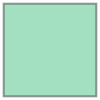

In [12]:
import shapely

bbox_polygon = shapely.geometry.box(
    bbox['westlon'], 
    bbox['minlat'], 
    bbox['eastlon'], 
    bbox['maxlat']
)

bbox_polygon

In [13]:
from pandas import concat
from geopandas import GeoDataFrame

gdf = GeoDataFrame(concat([
        query_results_hrsc,
        query_results_ctx,
        query_results_hirise,
    ],ignore_index=True))

In [14]:
def plot_geometries(gdf, ref_polygon=None, ref_label='Ref-Polygon'):
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots()

    polygon_lgd = None
    if ref_polygon:
        polygon_plt = ax.plot(*ref_polygon.exterior.xy, c='yellow')
        polygon_lgd = plt.legend(polygon_plt, [ref_label], loc=2)

    gdf.plot(alpha=0.5, edgecolor='red', column='inst',
             legend=True, legend_kwds={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}, 
             figsize=(24,16), ax=ax)

    if polygon_lgd:
        ax.add_artist(polygon_lgd)
        
    return ax

<AxesSubplot:>

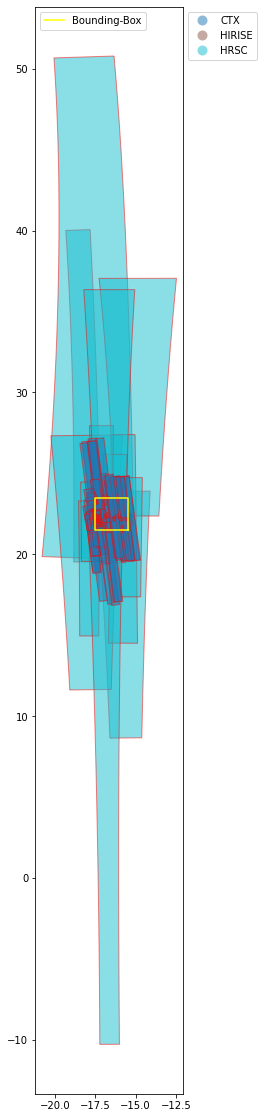

In [15]:
plot_geometries(gdf, bbox_polygon, 'Bounding-Box')

In [16]:
gdf.to_file('Mawrth_Vallis_ODE_products_intersect.geojson', driver='GeoJSON', index=False)

## Conclusion

We went through the selection of Mars image products -- more specifically, their footprints -- as provided by USGS/PDS/ODE' database. The whole of querying, filtering, selection, and metadata formating is implemented in NPT' `search` module.

Keypoints in the process (implemented in the internals of the library) are:

- ODE search interface understands geographical longitude coordinates in the range [0:360]. Accordingly, results (lon) coordinates are also in the same (0:360) range;
- Some footprints returned by ODE are of (shapely) formats *different from Polygon*: *GeometryCollection* or *MultiPolygon*. The reason is unknown to me, most probably some bug/lack of data validation in their pipeline.
  * NPT fixes that by "casting" those (wrong) geometries to their _envelope Polygon_;
- As in the example data here downloaded, some geometries do not properly represent the respective image (as you can see in the plot above): polygon is partially "empty". NPT does *not* fix those issues.

See the appendix section below for a summary of this notebook on retrieving on footprints *inside* the bounding-box.

## Appendix

### Selection of fully contained image products/footprints

In [17]:
query_results_ctx = npt.search.ode(dataset='mars/mro/ctx/edr', bbox=bbox, match='contain')
query_results_hirise = npt.search.ode(dataset='mars/mro/hirise/rdrv11', bbox=bbox, match='contain')
query_results_hrsc = npt.search.ode(dataset='mars/mex/hrsc/refdr3', bbox=bbox, match='contain')

gdf = GeoDataFrame(concat([
        query_results_hrsc,
        query_results_ctx,
        query_results_hirise,
    ],ignore_index=True))

INFO:_ode.parse(): 3 products found
INFO:_ode.parse(): 26 products found
INFO:_ode.parse(): 0 products found


<AxesSubplot:>

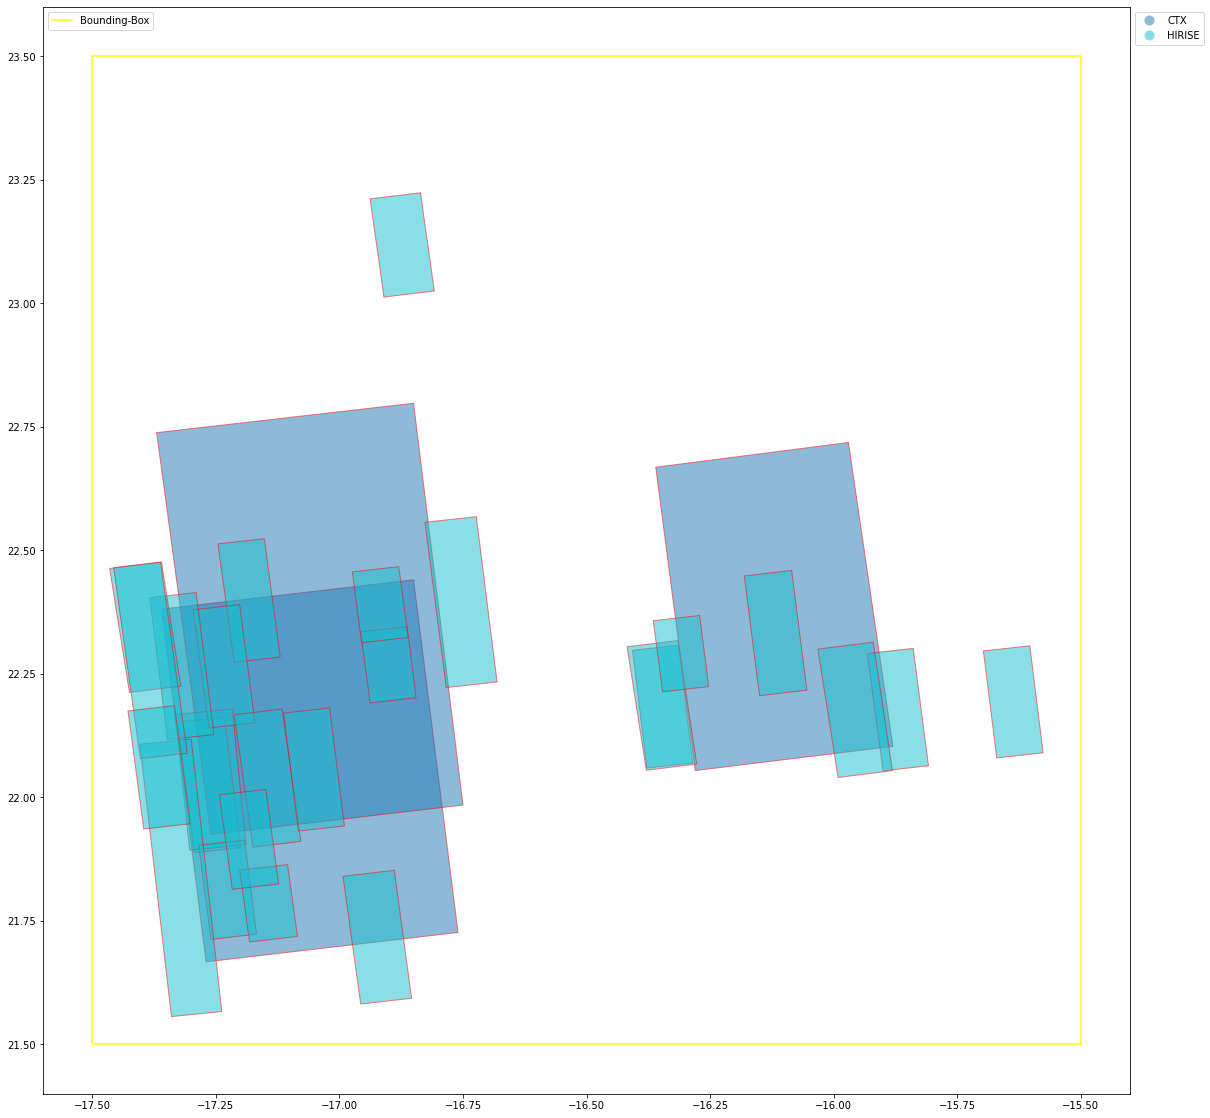

In [18]:
plot_geometries(gdf, bbox_polygon, 'Bounding-Box')

In [19]:
# gdf.to_file('Mawrth_Vallis_ODE_products_contain.geojson', driver='GeoJSON', index=False)